# Lick model

### This notebook is an initial attempt to model trains of licks when rats are choosing between two solutions (e.g. protein and carbohydrate)

In [131]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline 

In [218]:
# Initializes the system and system variables

System = {}
System['PP'] = 0.75
System['tau'] = 10
System['licksinburst'] = 0

In [219]:
def update_func2(System, licks):
    pp = System['PP']
    tau = System['tau']
    x = System['licksinburst']
    
    if licks[-1] == 0:
            if random.random() < pp:
                licks.append(2)            
            else:
                licks.append(1)
            System['licksinburst'] = x+1
    else:
        p_cont = math.exp(-x*(1/tau))
        if random.random() < p_cont:           
            licks.append(licks[-1])
            System['licksinburst'] = x+1
        else:
            licks.append(0)
            System['licksinburst'] = 0  
            

In [220]:
# Initializes the arrays to store data

licks = [0]

for i in range(1, 1000):
    update_func2(System, licks)
    # print(x, licks)

# print(licks)
print(np.mean([x-1 for x in licks if x>0]))

0.7478152309612984


In [221]:
# Create running average

N = 12
cumsum, licks_smooth = [0], []

for i, x in enumerate(licks, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        licks_smooth.append(moving_ave)

In [222]:
def interpret_med_data():
    print('To do')
    
    

In [223]:
# Code to calculate burst data
burstarray = []

tmp = []
for i, x in enumerate(licks):
    if x == 0:
        burstarray.append(tmp)
        tmp = []
    else:
        tmp.append(x)
        

burstlength1 = [len(x) for x in burstarray[1:] if x[0]==1]
burstlength2 = [len(x) for x in burstarray[1:] if x[0]==2]

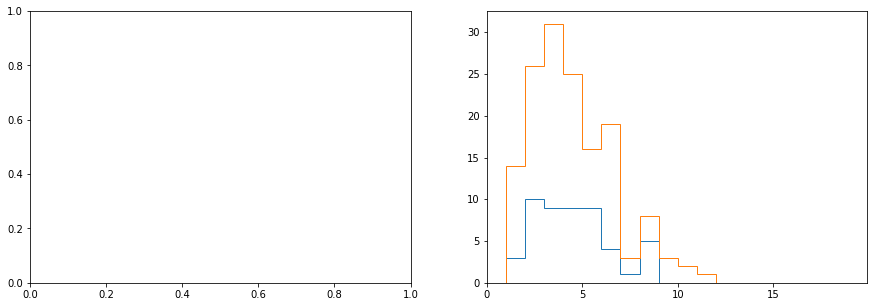

In [243]:
f, ax = plt.subplots(figsize=(15,5), ncols=2)

xy1 = [[i, x] for i, x in enumerate(licks) if x == 1]
array2 = [[i, x] for i, x in enumerate(licks) if x == 2]

#ax[0].plot(array1[0],array1[1], 'x')
#ax[0].scatter(array2, 'o')
#ax[0].plot(np.arange(0,1000),[System['PP']]*1000, 'g', linestyle='dashed')
#ax.set_xlim([0,10])
#ax[0].plot(licks_smooth)


bins = np.arange(1,20)
ax[1].hist(burstlength1, bins=bins, histtype='step')
ax[1].hist(burstlength2, bins=bins, histtype='step')
ax[1].set_xticks([0, 5, 10, 15])

In [244]:
xy1

[[1, 1],
 [2, 1],
 [3, 1],
 [15, 1],
 [17, 1],
 [18, 1],
 [19, 1],
 [59, 1],
 [60, 1],
 [61, 1],
 [62, 1],
 [63, 1],
 [73, 1],
 [74, 1],
 [75, 1],
 [77, 1],
 [78, 1],
 [79, 1],
 [80, 1],
 [81, 1],
 [82, 1],
 [83, 1],
 [84, 1],
 [99, 1],
 [100, 1],
 [101, 1],
 [117, 1],
 [118, 1],
 [119, 1],
 [120, 1],
 [121, 1],
 [122, 1],
 [145, 1],
 [146, 1],
 [162, 1],
 [163, 1],
 [164, 1],
 [165, 1],
 [166, 1],
 [195, 1],
 [196, 1],
 [197, 1],
 [198, 1],
 [221, 1],
 [222, 1],
 [223, 1],
 [224, 1],
 [253, 1],
 [254, 1],
 [315, 1],
 [316, 1],
 [317, 1],
 [318, 1],
 [347, 1],
 [348, 1],
 [368, 1],
 [369, 1],
 [370, 1],
 [371, 1],
 [387, 1],
 [388, 1],
 [389, 1],
 [390, 1],
 [400, 1],
 [401, 1],
 [402, 1],
 [416, 1],
 [417, 1],
 [418, 1],
 [419, 1],
 [420, 1],
 [421, 1],
 [422, 1],
 [423, 1],
 [425, 1],
 [426, 1],
 [427, 1],
 [428, 1],
 [429, 1],
 [430, 1],
 [458, 1],
 [459, 1],
 [460, 1],
 [475, 1],
 [476, 1],
 [477, 1],
 [478, 1],
 [479, 1],
 [481, 1],
 [482, 1],
 [483, 1],
 [484, 1],
 [485, 1],
 [50

AxesSubplot(0.125,0.125;0.775x0.755)


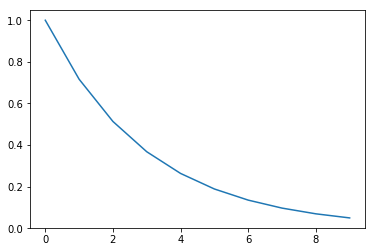

In [68]:
f, ax = plt.subplots()

lick_array = np.arange(0,10)
k=3
next_lick_p = [math.exp(-x*(1/k)) for x in lick_array]

ax.plot(lick_array, next_lick_p)

